In [62]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [63]:
def generate_ellipse(phi, width, height, size):
    x = np.vstack([width / 2 * np.cos(phi), height / 2 * np.sin(phi)]).T
    X = x + np.random.normal(0.0, 0.0125, (size,*x.shape))
    return X

$$a_1 x^2 + a_2 y^2 + a_3 x y + a_4 x + a_5 y = 1$$

In [64]:
def plot_ellipse():
    ellipse = Ellipse((0, 0), width=width, height=height, fill=False, edgecolor='blue', label='True curve')
    ax = plt.gca()
    ax.add_patch(ellipse)

In [65]:
def plot_curve(params):
    x = np.linspace(-1.0, 1.0, 150)
    y = np.linspace(-1.0, 1.0, 150)
    X, Y = np.meshgrid(x, y)
    A = np.dstack([X**2,Y**2,X*Y,X,Y])
    F = np.dot(A, params) - 1

    ax = plt.gca()
    ax.contour(X, Y, F, levels=[0], label="Predicted curve")

In [66]:
width, height = 2, 1.25

lim = 2.5 / 180.0 * np.pi
phi = np.linspace(-lim, lim, 4)
x = generate_ellipse(phi, width, height, 4)

In [67]:
def fit_ellipse(x, rcound = None):
    x = x.reshape(-1, 2)
    A = np.hstack((x**2, x.prod(axis=1).reshape(-1, 1), x))
    b = np.ones(x.shape[0])
    out = np.linalg.lstsq(A, b, rcond=rcound)
    cov = out[1] / (A.shape[0] - A.shape[1])*np.linalg.inv(A.T@A)
    cond = np.linalg.cond(A)
    return out + (cond, cov )

In [68]:
params, cost, n , err, cond, cov = fit_ellipse(x, rcound=0.1)
params

ValueError: operands could not be broadcast together with shapes (0,) (5,5) 

/tmp/ipykernel_10485/836599439.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, F, levels=[0], label="Predicted curve")


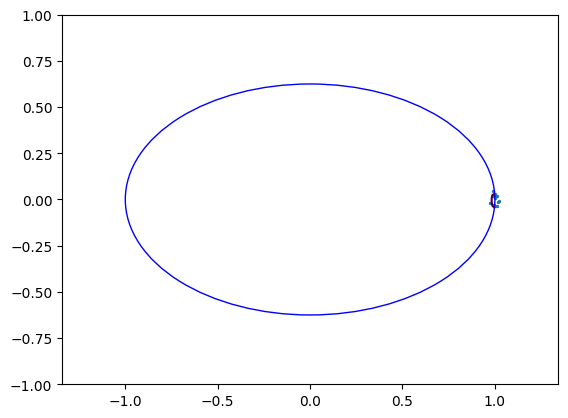

In [ ]:
#plt.figure(figsize=(15, 6))
plt.scatter(*x.T, s=2)

plot_ellipse(
    
)
plot_curve(params)

plt.axis('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

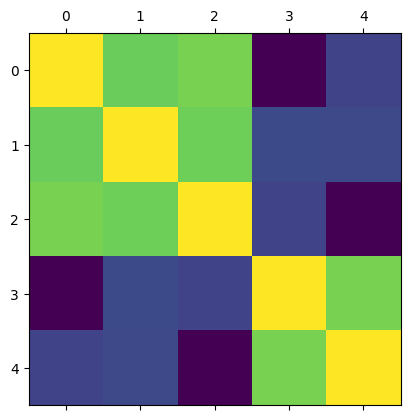

In [ ]:
sigma = np.sqrt(np.diag(cov))
cor = cov / np.outer(sigma, sigma)
plt.matshow(cor)

In [ ]:
data_set = 0

if data_set == 0:
    z = generate_ellipse(-np.pi, width, height, 4)
    x = np.hstack([x, z])

if data_set == 1:
    z = generate_ellipse(0.5 * np.pi, width, height, 4)
    x = np.hstack([x, z])

if data_set == 2:
    z = generate_ellipse(-0.5 * np.pi, width, height, 4)
    x = np.hstack([x, z])
    
if data_set == 3:
    z = generate_ellipse(0, width, height, 4)
    x = np.hstack([x, z])

In [ ]:
z = generate_ellipse(0, width, height, 4)
x = np.hstack([x, z])

### Делаем замену переменных.

Старая модель:

$$a_1 x^2 + a_2 y^2 + a_3 x y + a_4 x + a_5 y = 1$$

Нам бы хотелось, чтобы псевдорешение (т.е. вектор $\bf{a}$ с минимальной нормой) было похоже на нужный нам геометрический объект.

$$a_1 \approx \left({\frac{2}{W}}\right)^2$$
$$a_2 \approx \left({\frac{2}{H}}\right)^2$$
$$a_3 = a_4 = a_5 \approx 0$$

Сделаем замену переменных 

$$b_1 = a_1 - \left({\frac{2}{W}}\right)^2$$
$$b_2 = a_2 - \left({\frac{2}{H}}\right)^2$$
$$b_3 = a_3$$
$$b_4 = a_4$$
$$b_5 = a_5$$

Тогда новая модель:

$$b_1 x^2 + b_2 y^2 + b_3 x y + b_4 x + b_5 y = 1 - x^2 \left({\frac{2}{W}}\right)^2 - y^2 \left({\frac{2}{H}}\right)^2$$